In [7]:
from abc_analysis import abc_analysis
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('data/SupplyChainDataset_cleaned.parquet')
df['Order time'] = df['Order date'].dt.time
df['Shipping time'] = df['Shipping date'].dt.time
df['Shipping date'] = df['Shipping date'].dt.date
df['Order date'] = df['Order date'].dt.date
df.head()

,Type,Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,...,Product Card Id,Product Price,Shipping Mode,Shipping date,Order date,Order time,Order day,Shipping time,Shipping day,Target shipping days
0,CASH,88.79,239.98,0,43,Hickory,United States,11599,Consumer,NC,...,957,299.980011,Standard Class,2015-03-01,2015-01-01,00:00:00,Thursday,00:00:00,Sunday,-2
1,PAYMENT,36.47,107.89,0,18,Chicago,United States,256,Consumer,IL,...,403,129.990005,Standard Class,2015-04-01,2015-01-01,00:21:00,Thursday,00:21:00,Wednesday,-1
2,PAYMENT,91.18,193.99,0,48,Chicago,United States,256,Consumer,IL,...,1073,199.990005,Standard Class,2015-04-01,2015-01-01,00:21:00,Thursday,00:21:00,Wednesday,-1
3,PAYMENT,68.25,227.50,0,24,Chicago,United States,256,Consumer,IL,...,502,50.000000,Standard Class,2015-04-01,2015-01-01,00:21:00,Thursday,00:21:00,Wednesday,-1
4,PAYMENT,19.80,90.00,1,24,Conway,United States,10039,Consumer,AR,...,502,50.000000,Standard Class,2015-07-01,2015-01-01,10:09:00,Thursday,10:09:00,Wednesday,2


In [3]:
abc_analysis_df = df.groupby('Product Card Id')[['Order Item Quantity', 'Benefit per order']].sum()

In [4]:
abc_analysis_df = abc_analysis_df.reset_index()

/Users/miladziekanowska/anaconda3/lib/python3.10/site-packages/abc_analysis/abc_analysis.py:184: UserWarning: negative values found. Will continue by replacing them by 0. This can lead to unexpected results!
  warnings.warn(
/Users/miladziekanowska/anaconda3/lib/python3.10/site-packages/abc_analysis/abc_analysis.py:184: UserWarning: negative values found. Will continue by replacing them by 0. This can lead to unexpected results!
  warnings.warn(


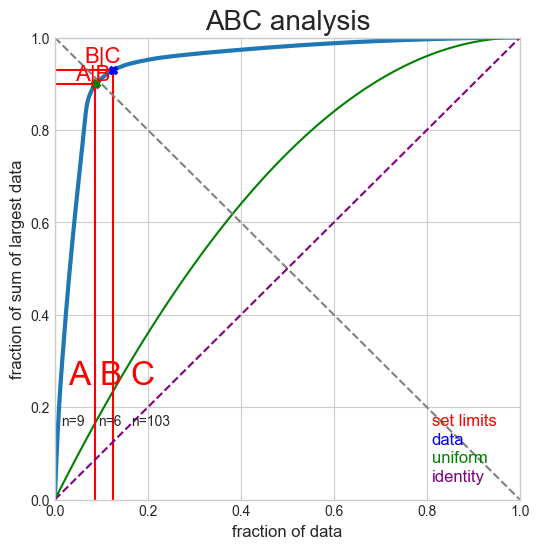

In [5]:
abc = abc_analysis(abc_analysis_df['Benefit per order'], True)

In [8]:
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

cond_list = [abc_analysis_df.index.isin(a_index),
             abc_analysis_df.index.isin(b_index),
             abc_analysis_df.index.isin(c_index)]

choice = ['A', 'B', 'C']

abc_analysis_df['abc'] = np.select(cond_list, choice)

In [9]:
abc_analysis_df[abc_analysis_df['abc'] =='B']

,Product Card Id,Order Item Quantity,Benefit per order,abc
103,1349,592,30289.80,B
104,1350,652,27178.10,B
105,1351,442,69656.81,B
107,1353,484,25531.17,B
109,1355,484,33443.01,B
117,1363,650,19102.85,B
